<a href="https://colab.research.google.com/github/michalastocki/data-science-bootcamp/blob/master/07_uczenie_glebokie/04_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Transfer Learning z użyciem Tensorflow Hub

Tensorflow Hub: [tfhub.dev](https://tfhub.dev/)

Tensorflow Hub to biblioteka pozwalająca na wielokrotne i darmowe wykorzystywanie modułów modeli uczenia maszynowego. Tzw. transfer learning pozwala nam skorzystać z wcześniej wyuczonych modeli uczenia maszynowego na bardzo dużych zbiorach danych z zaawansowaną architekturą. Pozwala to zdecydowanie zaoszczędzic sporo czasu na dewelopowaniu własnych modeli, czy chociażby na mocy obliczeniowej wykorzystywaniej podczas trenowania. 

Przykłady użycia transfer learningu:
 - trenowanie modelu z małym zbiorem danych
 - pozwala poprawić generalizację modeli
 - przyśpiesza proces trenowania modeli
 - niski próg wejścia dla osób chcących poznać zastosowania modeli

 ### Spis treści:
1. [Import bibliotek](#a1)
2. [Załadowanie modelu](#a2)
3. [Załadowanie etykiet](#a3)
4. [Załadowanie obrazu](#a4)
5. [Predykcja na podstawie modelu](#a5)
6. [Wyświetlenie predykcji](#a6)







### <a name='a1'></a>Import bibliotek

In [1]:
%tensorflow_version 2.x
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f'Tensorflow version: {tf.__version__}')
print(f'Tensorflow Hub version: {hub.__version__}')

TensorFlow 2.x selected.
Tensorflow version: 2.1.0
Tensorflow Hub version: 0.7.0


### <a name='a2'></a> Załadowanie modelu

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

### <a name='a3'></a> Załadowanie etykiet

In [3]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

16384/10484 [==============================================] - 0s 0us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

### <a name='a4'></a> Załadowanie obrazu

In [0]:
from google.colab import files
uploaded = files.upload()

Saving office.jpg to office (1).jpg


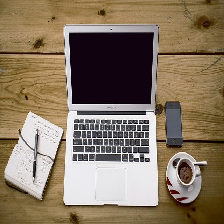

In [0]:
filename = list(uploaded.keys())[0]
img = Image.open(filename).resize(IMAGE_SHAPE)
img

### <a name='a5'></a> Predykcja na podstawie modelu

In [0]:
img_arr = np.array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

'notebook'

### <a name='a6'></a> Wyświetlenie predykcji

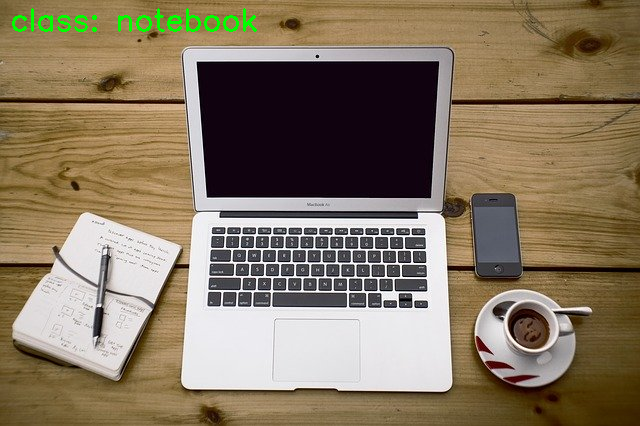

In [0]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
cv2_imshow(img)